In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)

for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.1.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.2
pandas 0.25.1
sklearn 0.21.3
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing= fetch_california_housing()

In [4]:
from sklearn.model_selection import train_test_split

x_train_all,x_test,y_train_all,y_test = train_test_split(
    housing.data, housing.target, random_state =7)

x_train,x_valid,y_train,y_valid = train_test_split(
    x_train_all,y_train_all,random_state=11)

print(x_train_all.shape,y_train_all.shape)
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(15480, 8) (15480,)
(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_valid)
x_test_scaled = scaler.fit_transform(x_test)

In [17]:
# learning_rate:[1e-4,3e-4,1e-3,3e-3,1e-2,3e-2]
# w = w + grad * learning_rate

learning_rates = [1e-4,3e-4,1e-3,3e-3,1e-2,3e-2]
histories = []

for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30,activation='relu',
                          input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    
    optimizer = keras.optimizers.SGD(lr)

    model.summary()
    model.compile(loss='mse',optimizer=optimizer)

    callbacks = [keras.callbacks.EarlyStopping(
        patience=5, min_delta=1e-2)]
    
    history = model.fit(x_train_scaled,y_train,
                   validation_data= (x_valid_scaled,y_valid),
                   epochs=100,
                   callbacks=callbacks)
    histories.append(history)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 61us/sample - loss: 5.2847 - val_loss: 4.6395
Epoch 2/100
11610/11610 [==============================] - 0s 34us/sample - loss: 3.7812 - val_loss: 3.4775
Epoch 3/100
11610/11610 [==============================] - 0s 32us/sample - loss: 2.8691 - val_loss: 2.7389
Epoch 4/100
11610/11610 [==============================] - 0s 36us/sample - loss: 2.2801 - val_loss: 2.2390
Epoch 5/100
11610/11610 [============

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 54us/sample - loss: 4.6480 - val_loss: 3.2036
Epoch 2/100
11610/11610 [==============================] - 0s 33us/sample - loss: 2.3297 - val_loss: 1.9536
Epoch 3/100
11610/11610 [==============================] - 0s 31us/sample - loss: 1.5377 - val_loss: 1.4277
Epoch 4/100
11610/11610 [==============================] - 0s 33us/sample - loss: 1.1747 - val_loss: 1.1595
Epoch 5/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.9871 - val_loss: 1.0152
Epoch 6/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.8841 - val_loss: 0.9324
Epoch 7/100
11610/11610 [==============================] - 1s 50us/sample - loss: 0.8228 - val_loss: 0.8779
Epoch 8/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.7833 - val_loss: 0.8418
Epoch 9/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.755

Epoch 13/100
11610/11610 [==============================] - 0s 25us/sample - loss: 0.4975 - val_loss: 0.5193
Epoch 14/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4911 - val_loss: 0.5122
Epoch 15/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4851 - val_loss: 0.5046
Epoch 16/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4797 - val_loss: 0.4982
Epoch 17/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4747 - val_loss: 0.4933
Epoch 18/100
11610/11610 [==============================] - 0s 25us/sample - loss: 0.4702 - val_loss: 0.4865
Epoch 19/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4656 - val_loss: 0.4814
Epoch 20/100
11610/11610 [==============================] - 0s 26us/sample - loss: 0.4614 - val_loss: 0.4765
Epoch 21/100
11610/11610 [==============================] - 0s 26us/sample - loss: 0.4574 - val_loss: 0.4723
Epoch 22/100
11610/

11610/11610 [==============================] - 0s 30us/sample - loss: 0.3684 - val_loss: 0.3923
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.9010 - val_loss: 3.0542
Epoch 2/100
11610/11610 [==============================] - 0s 32us/sample - loss: nan - val_loss: nan
Epoch 3/100
11610/11610 [==============================] - 0s 33us/sample - loss: nan - val_loss: nan
Epoch 4/100
11610/11610 [==============================] - 0s

Learning_rate: 0.0001


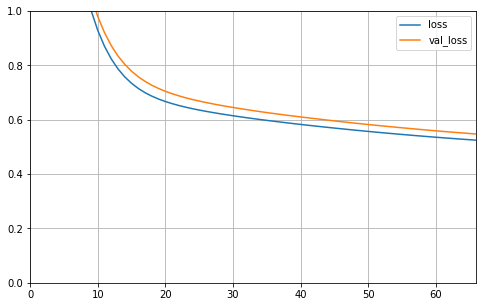

Learning_rate: 0.0003


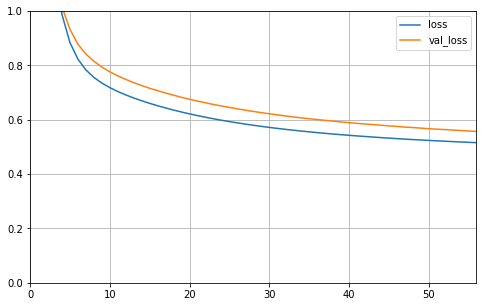

Learning_rate: 0.001


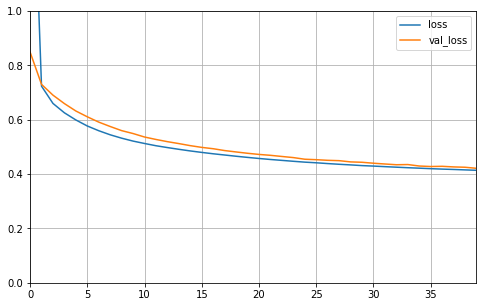

Learning_rate: 0.003


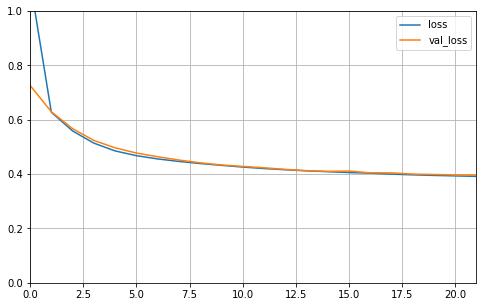

Learning_rate: 0.01


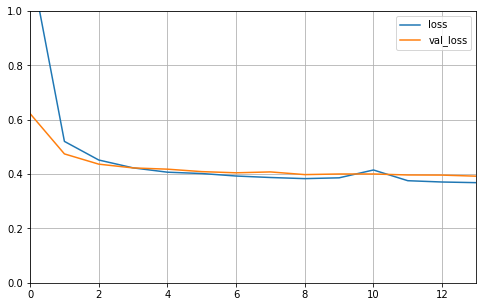

Learning_rate: 0.03


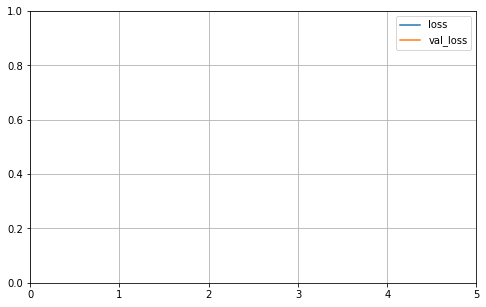

In [18]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

for lr,history in zip(learning_rates,histories):
    print("Learning_rate:",lr)
    plot_learning_curves(history)